---
**Linear Regression vs Logistic Regression**

1. **Linear Regression**
- In Linear Regression we map an infinite continuous range of values into another infinite continuous range of values, using a linear equation of the form:
    $$y(x) = m*x + k$$
- This allows us to predict continuous numerical data from given continuous numerical data.

2. **Logistic Regression**
- In Logistic Regression we map an infinite continuous range of values into a finite continuous range of values, typically 0 to 1, using the sigmoid function:
    $$\sigma(x) = \frac{1}{1 + e^{-m*x+k}}$$

- Some values get mapped very close to 0, some get mapped very close to 1 and some in between.
- This allows us to classify a continuous numerical data into some discrete classes (typicaly 2).
- This is mainly used to solve those problems where we need to find a partition point.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def plot_line(m, k, n, c):
    x = np.linspace(-5, 5, 101)
    y = n / (1 + np.exp(-m*x + k)) + c
    plt.figure(figsize=(4, 4))
    plt.plot(x, y, label=f'sigmoid curve')
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid()
    plt.xlim(-5, 5)
    plt.xticks([xt for xt in range(-5, 5)])
    plt.ylim(-5, 5)
    plt.yticks([yt for yt in range(-5, 5)])
    plt.show()

# Interactive sliders for parameters
interact(plot_line,
         m=IntSlider(value=1, min=-20, max=20, step=1, description='x-squeeze'),
         k=IntSlider(value=0, min=-20, max=20, step=1, description='x-shift'),
         n=IntSlider(value=1, min=-20, max=20, step=1, description='y-stretch'),
         c=IntSlider(value=0, min=-20, max=20, step=1, description='y-shift')
)

# For a binary classification problem
# y-stretch: n = 1
# y-shift  : c = 0
# sigmoid curve: 1 / (1 + e^(-mx + k))

---
**Implementation of Logistic Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Example data
x = np.array([[1], [2], [3], [7], [8]]) # features (numerical)
y = np.array([0, 0, 0, 1, 1])           # labels (binary)

# Create the model
model = LogisticRegression()

# Train (fit) the model
model.fit(x, y)

# Plot the data points
plt.scatter(x, y, color='blue', label='Data Points')

# # Plot the logistic curve
# x_plot = np.linspace(-2, 12, 101).reshape(-1, 1)
# y_prob = model.predict_proba(x_plot)[:, 1]
# plt.plot(x_plot, y_prob, color='gray', linestyle=':', label='Logistic Curve')
# Plot the logistic curve
x_plot = np.linspace(-2, 12, 101)
y_prob = 1 / (1 + np.exp(-model.coef_[0][0] * x_plot - model.intercept_[0]))
plt.plot(x_plot, y_prob, color='gray', linestyle=':', label='Logistic Curve')

x_plot = np.linspace(-2, 12, 101)
y_prob = 1 / (1 + np.exp(-0.2*model.coef_[0][0] * x_plot - 0.2*model.intercept_[0]))
plt.plot(x_plot, y_prob, color='blue', linestyle=':', label='Logistic Curve')

# Plot the partition line
m = model.coef_[0][0]   # slope term / horizontal squeeze
k = model.intercept_[0] # bias term / horizontal shift
partition = -(k / m)    # partition point with 0.5 probability
plt.axvline(x=partition, color='red', linestyle='--', label='Partition Line')

# Plot the predictions
inputs = np.array([[0], [4], [5], [6], [9]])
predictions = model.predict(inputs)
probabilities = model.predict_proba(inputs)
x_pred = inputs.reshape(-1)
y_pred = probabilities[:, 1]
plt.scatter(x_pred, y_pred, color='green', label='Predictions')
for i, clss in enumerate(predictions):
    plt.text(x_pred[i] - 0.01, y_pred[i] + 0.02, str(clss), color='red')



plt.xlabel('Feature (x)')
plt.ylabel('Predicted Probability for class = 1')
plt.title('Logistic Regression Curve')
plt.legend()
plt.grid()
plt.show()

ans = list(zip(inputs[:, 0], probabilities, predictions))
for pair in ans:
    print(f"value = {pair[0]} | prob for class_0 = {pair[1][0]:.4f} | prob for class_1 = {pair[1][1]:.4f} | predicted class = {pair[2]} ")

---
**Application of Logistic Regression**

Applying Logistic Regression to classify Iris flowers into species based on flower features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

---
**Data splitting - Training and Test Data**

- To measure the performance of the trained model we need to test it against some data.
- We can't test it on the same data as on which it is trained.
- For this purpose, We split the given dataset into two subsets - `training dataset` & `testing dataset`.
- `training dataset` is used to train the model. Typical size 70-90% of the original data.
- `testing dataset` is used to test the model. Typical size 10-30% of the original data.

In [40]:
from sklearn.model_selection import train_test_split

# Example data
X = np.array([[1], [2], [3], [7], [8]]) # features (numerical)
Y = np.array([0, 0, 0, 1, 1])           # labels (binary)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

print("\nOriginal Dataset")
print(X)
print(Y)
print("\nTraining Dataset")
print(X_train)
print(Y_train)
print("\nTesting Dataset")
print(X_test)
print(Y_test)


Original Dataset
[[1]
 [2]
 [3]
 [7]
 [8]]
[0 0 0 1 1]

Training Dataset
[[2]
 [7]
 [8]]
[0 1 1]

Testing Dataset
[[3]
 [1]]
[0 0]


Accuracy: 1.0


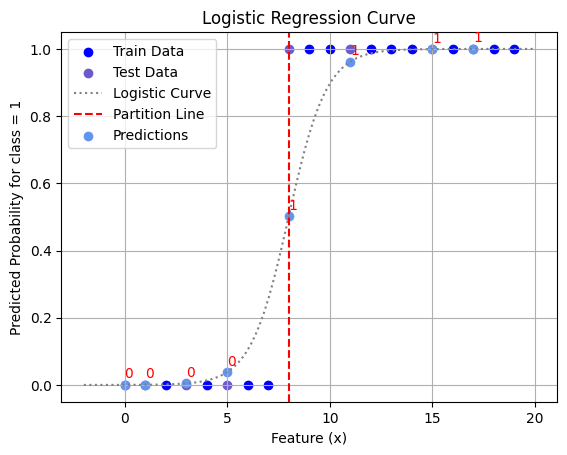

In [75]:
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Example data
N = 20
X = np.array([[x] for x in range(N)])
Y = np.array([int(x > 0.35*N) for x in range(N)])
for i, val in enumerate(Y):
    if(random.random() < min(i, (N/2)-i)/N):
        Y[i] = 1-Y[i]

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Test model
print("Accuracy:", model.score(X_test, Y_test))

# Plot the data points
plt.scatter(X_train, Y_train, color='blue', label='Train Data')
plt.scatter(X_test, Y_test, color='slateblue', label='Test Data')

# Plot the logistic curve
x_plot = np.linspace(-2, N, 101).reshape(-1, 1)
y_prob = model.predict_proba(x_plot)[:, 1]
plt.plot(x_plot, y_prob, color='gray', linestyle=':', label='Logistic Curve')

# Plot the partition line
m = model.coef_[0][0]   # slope term / horizontal squeeze
k = model.intercept_[0] # bias term / horizontal shift
partition = -(k / m)    # partition point with 0.5 probability
plt.axvline(x=partition, color='red', linestyle='--', label='Partition Line')

# # Plot the predictions
inputs = X_test
predictions = model.predict(inputs)
probabilities = model.predict_proba(inputs)
x_pred = inputs.reshape(-1)
y_pred = probabilities[:, 1]
plt.scatter(x_pred, y_pred, color='cornflowerblue', label='Predictions')
for i, clss in enumerate(predictions):
    plt.text(x_pred[i] - 0.01, y_pred[i] + 0.02, str(clss), color='red')



plt.xlabel('Feature (x)')
plt.ylabel('Predicted Probability for class = 1')
plt.title('Logistic Regression Curve')
plt.legend()
plt.grid()
plt.show()


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load data
X, y = load_iris(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
